<a href="https://colab.research.google.com/github/prem3097/Data-analyst-project2/blob/main/moviesclean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Uploading the csv file.
df=pd.read_csv('/content/movies.csv')

In [3]:
#Checking info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [4]:
#Removeing unwanted column and changeing the column name.
df.rename(columns={'RunTime': 'RUNTIME','Gross':'GROSS'}, inplace=True)
df['YEAR'] = df['YEAR'].str.extract(r'(\d{4})')
df.drop("STARS", axis=1, inplace=True)

In [5]:
# Replace inf with NaN (if any), then drop rows with NaN in RUNTIME
df['RUNTIME'] = df['RUNTIME'].replace('nan', np.nan)
df['ONE-LINE'] = df['ONE-LINE'].replace('\nAdd a Plot\n', np.nan)
df['RUNTIME'] = df['RUNTIME'].dropna()

In [6]:
# Replace inf with NaN (if any), then drop rows with NaN in RUNTIME
df['RUNTIME'] = df['RUNTIME'].replace([np.inf, -np.inf], np.nan)
df['RUNTIME'] = df['RUNTIME'].dropna()
df['RUNTIME'] = df['RUNTIME'].replace([np.inf, -np.inf], np.nan)
df = df[df['RUNTIME'].notna()]
df['RUNTIME'] = df['RUNTIME'].abs().round().astype(int)
# Now convert to absolute rounded integers safely
df['RUNTIME'] = df['RUNTIME'].abs().round().astype(int)

/tmp/ipython-input-6-3119454546.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RUNTIME'] = df['RUNTIME'].abs().round().astype(int)
/tmp/ipython-input-6-3119454546.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RUNTIME'] = df['RUNTIME'].abs().round().astype(int)


In [7]:
#Checking null values.
df.isnull().sum()

,0
MOVIES,0
YEAR,30
GENRE,9
RATING,255
ONE-LINE,212
VOTES,255
RUNTIME,0
GROSS,6581


In [8]:
#Filling all null values.
x = df["YEAR"].mode()[0]
df.fillna({"YEAR": x}, inplace=True)
x = df["GENRE"].mode()[0]
df.fillna({"GENRE": x}, inplace=True)
x = df["RATING"].mode()[0]
df.fillna({"RATING": x}, inplace=True)
x = df["RUNTIME"].mean()
df.fillna({"RUNTIME": x}, inplace=True)
x = df["VOTES"].mode()[0]
df.fillna({"VOTES": x}, inplace=True)
x = df["GROSS"].mode()[0]
df.fillna({"GROSS": x}, inplace=True)
x = df["ONE-LINE"].mode()[0]
df.fillna({"ONE-LINE": x}, inplace=True)
df.isnull().sum()

/tmp/ipython-input-8-3739910013.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna({"YEAR": x}, inplace=True)
/tmp/ipython-input-8-3739910013.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna({"GENRE": x}, inplace=True)
/tmp/ipython-input-8-3739910013.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna({"RATING": x}, inplace=True)
/tmp/ipython-input-8-3739910013.py:9: SettingWithCopyWarning: 
A value is

,0
MOVIES,0
YEAR,0
GENRE,0
RATING,0
ONE-LINE,0
VOTES,0
RUNTIME,0
GROSS,0


In [9]:
#Checking the duplicate values.
df.duplicated().sum()

np.int64(37)

In [10]:
#Clearing all duplicate values.
df.drop_duplicates(inplace=True)
df.duplicated().sum()

/tmp/ipython-input-10-2195400821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


np.int64(0)

In [11]:
#Downloding the cleaned file and reseting the index.
df.reset_index(drop=True, inplace=True)
df.to_excel("/content/movies.xlsx")
df

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,VOTES,RUNTIME,GROSS
0,Blood Red Sky,2021,"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,"21,062",121,$0.01M
1,Masters of the Universe: Revelation,2021,"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"17,870",25,$0.01M
2,The Walking Dead,2010,"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"885,805",44,$0.01M
3,Rick and Morty,2013,"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"414,849",23,$0.01M
4,Outer Banks,2020,"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"25,858",50,$0.01M
...,...,...,...,...,...,...,...,...
6999,Sexify,2021,"\nComedy, Drama",7.1,\nAfter facing their parents at Easter breakfa...,103,37,$0.01M
7000,Sexify,2021,"\nComedy, Drama",6.9,\nAfter getting an anonymous tip about the cop...,96,40,$0.01M
7001,Sexify,2021,"\nComedy, Drama",7.1,\nThe big pitch at the university tech competi...,100,47,$0.01M
7002,Castlevania,2017,"\nAnimation, Action, Adventure",8.2,\nLenore urges Hector to not test Camilla's pa...,911,24,$0.01M


In [12]:
# Clean data
df['GENRE'] = df['GENRE'].str.strip().str.replace(r"\n", "", regex=True)
df['VOTES'] = df['VOTES'].str.replace(",", "").astype(float)
df['GROSS'] = df['GROSS'].replace('[\$,M]', '', regex=True).astype(float)
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
df = df.dropna(subset=['YEAR', 'RATING'])

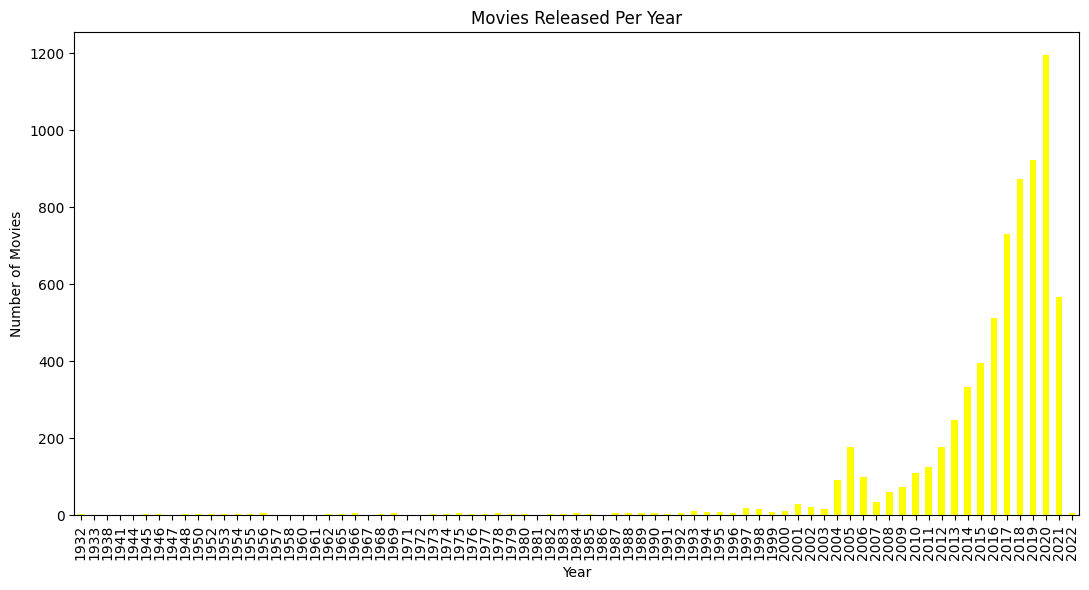

In [13]:
# 1. Movies released per year
plt.figure(figsize=(11,6))
df['YEAR'].value_counts().sort_index().plot(kind='bar',color='yellow')
plt.title('Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

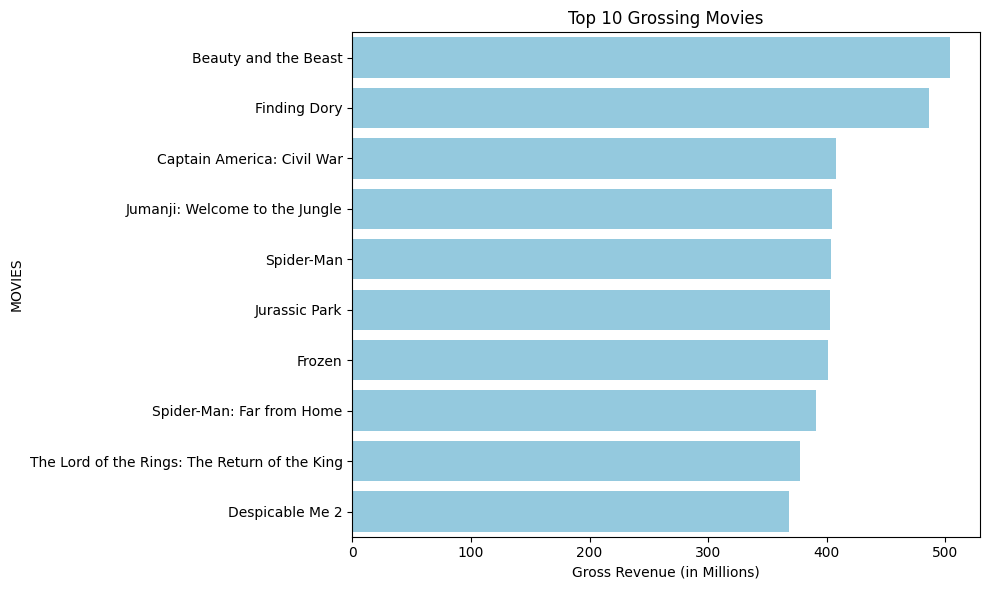

In [14]:
# 2. Top 10 highest grossing movies
top_gross = df[['MOVIES', 'GROSS']].sort_values(by='GROSS', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_gross, y='MOVIES', x='GROSS',color='skyblue')
plt.title('Top 10 Grossing Movies')
plt.xlabel('Gross Revenue (in Millions)')
plt.tight_layout()
plt.show()

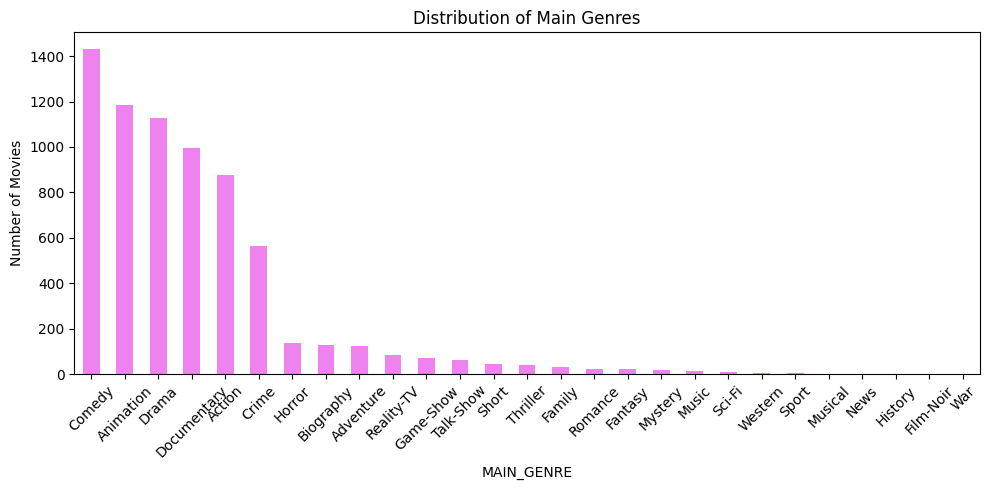

In [15]:
# 3. Genre distribution
df['MAIN_GENRE'] = df['GENRE'].apply(lambda x: x.split(',')[0].strip() if isinstance(x, str) else x)
plt.figure(figsize=(10,5))
df['MAIN_GENRE'].value_counts().plot(kind='bar',color='violet')
plt.title('Distribution of Main Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

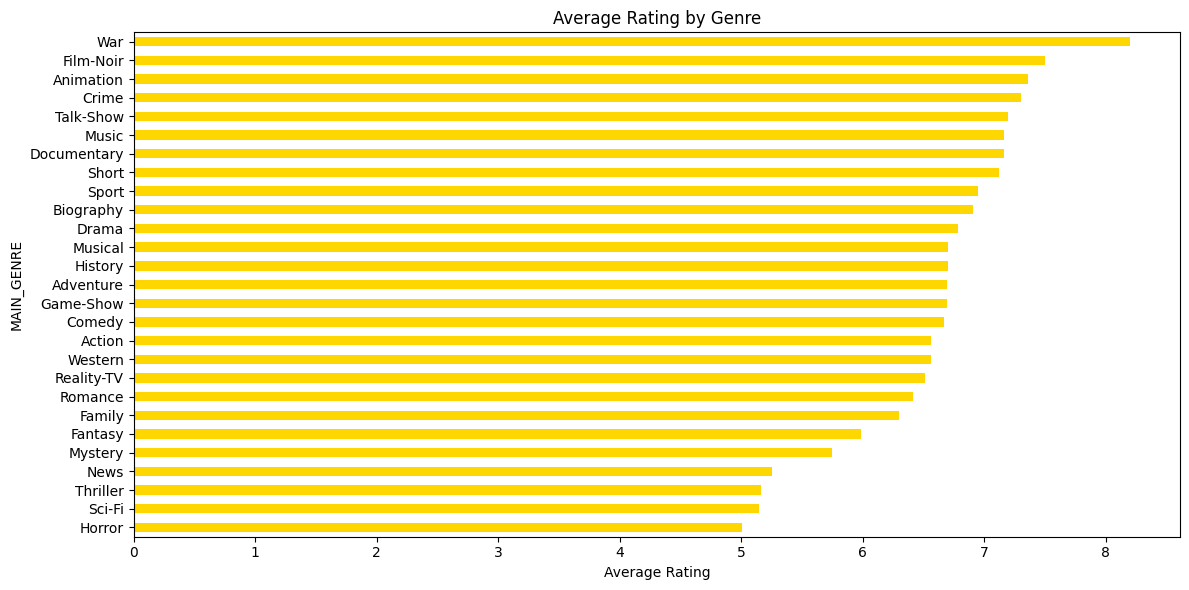

In [16]:
# 4. Average rating per genre
plt.figure(figsize=(12,6))
genre_ratings = df.groupby('MAIN_GENRE')['RATING'].mean().sort_values()
genre_ratings.plot(kind='barh',color='gold')
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.tight_layout()
plt.show()

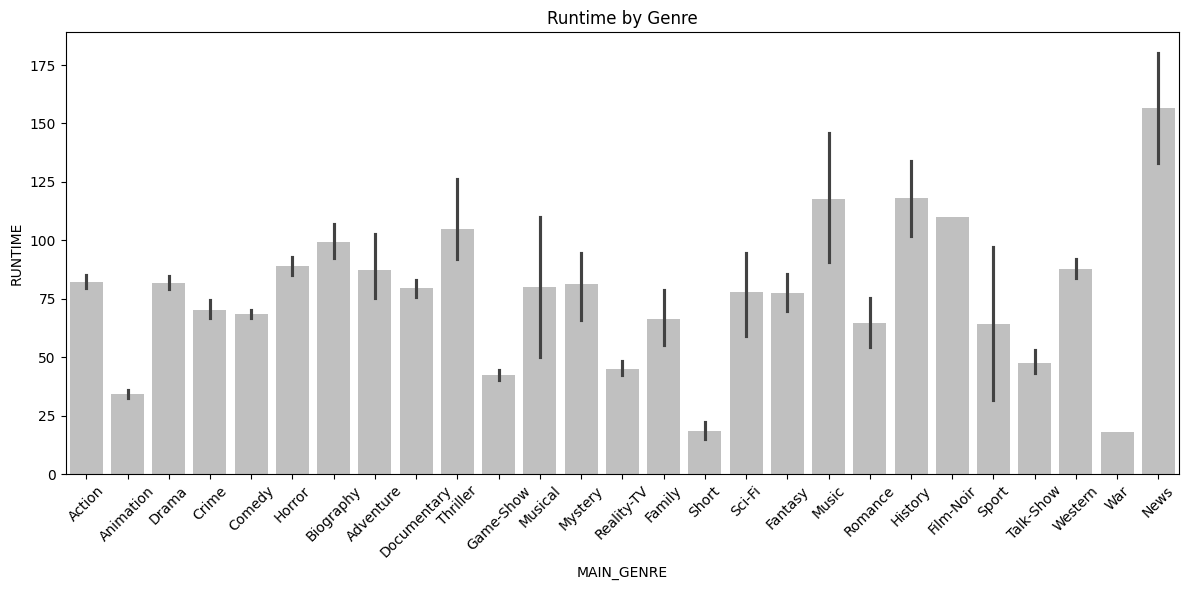

In [17]:
# 5. Runtime variation across genres
plt.figure(figsize=(12,6))
sns.barplot(data=df, x='MAIN_GENRE', y='RUNTIME',color='silver')
plt.title('Runtime by Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

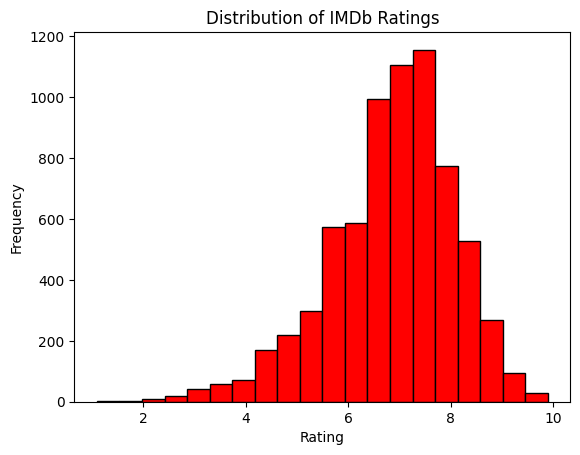

In [18]:
# 6.Distribution of IMDb Ratings.
df['RATING'].plot(kind='hist', bins=20, edgecolor='black',color='red')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

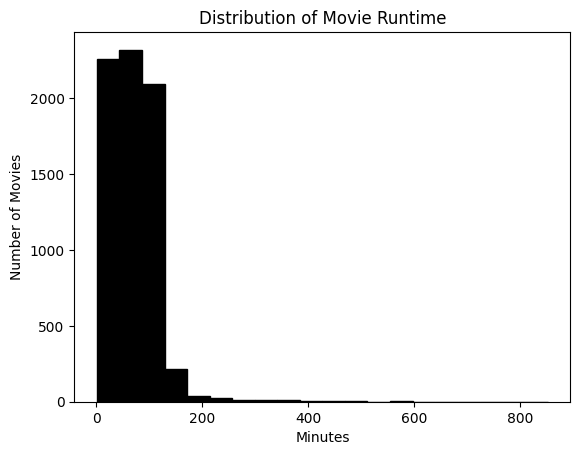

In [19]:
# 7.Distribution of Movie Runtime.
df['RUNTIME'].plot(kind='hist', bins=20, edgecolor='black',color='black')
plt.title('Distribution of Movie Runtime')
plt.xlabel('Minutes')
plt.ylabel('Number of Movies')
plt.show()

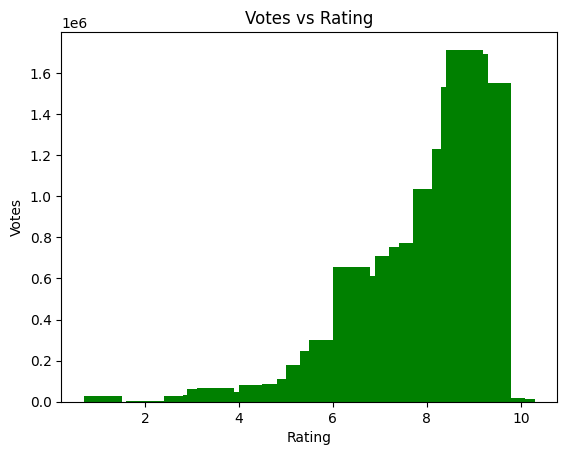

In [20]:
# 8.Distribution of Movie Runtime
plt.bar(df['RATING'], df['VOTES'],color='green')
plt.title('Votes vs Rating')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.show()

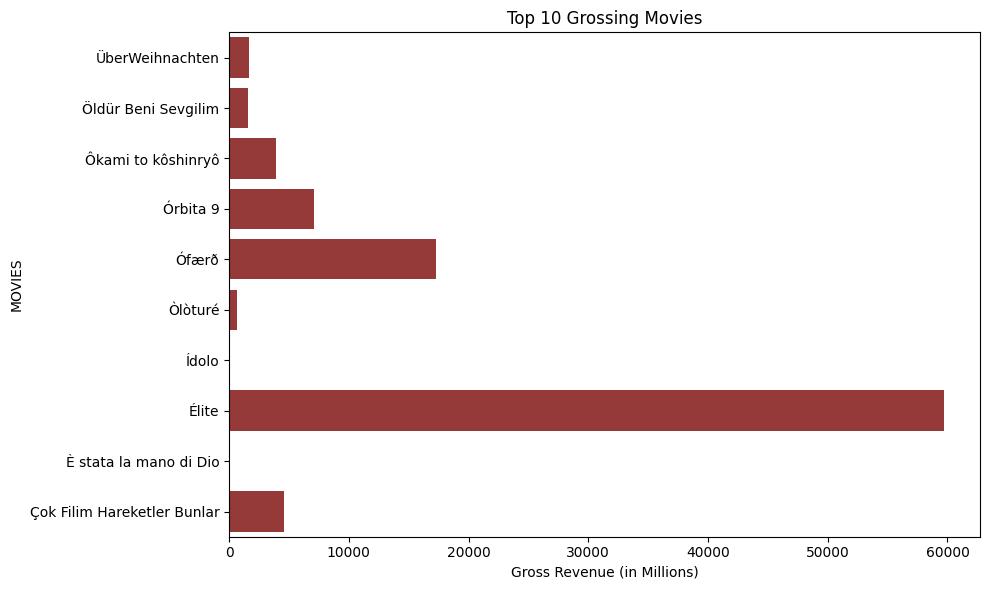

In [21]:
# 9. Top 10 highest grossing movies
top_votes = df[['VOTES', 'MOVIES']].sort_values(by='MOVIES', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_votes, y='MOVIES', x='VOTES',color='brown')
plt.title('Top 10 Grossing Movies')
plt.xlabel('Gross Revenue (in Millions)')
plt.tight_layout()
plt.show()

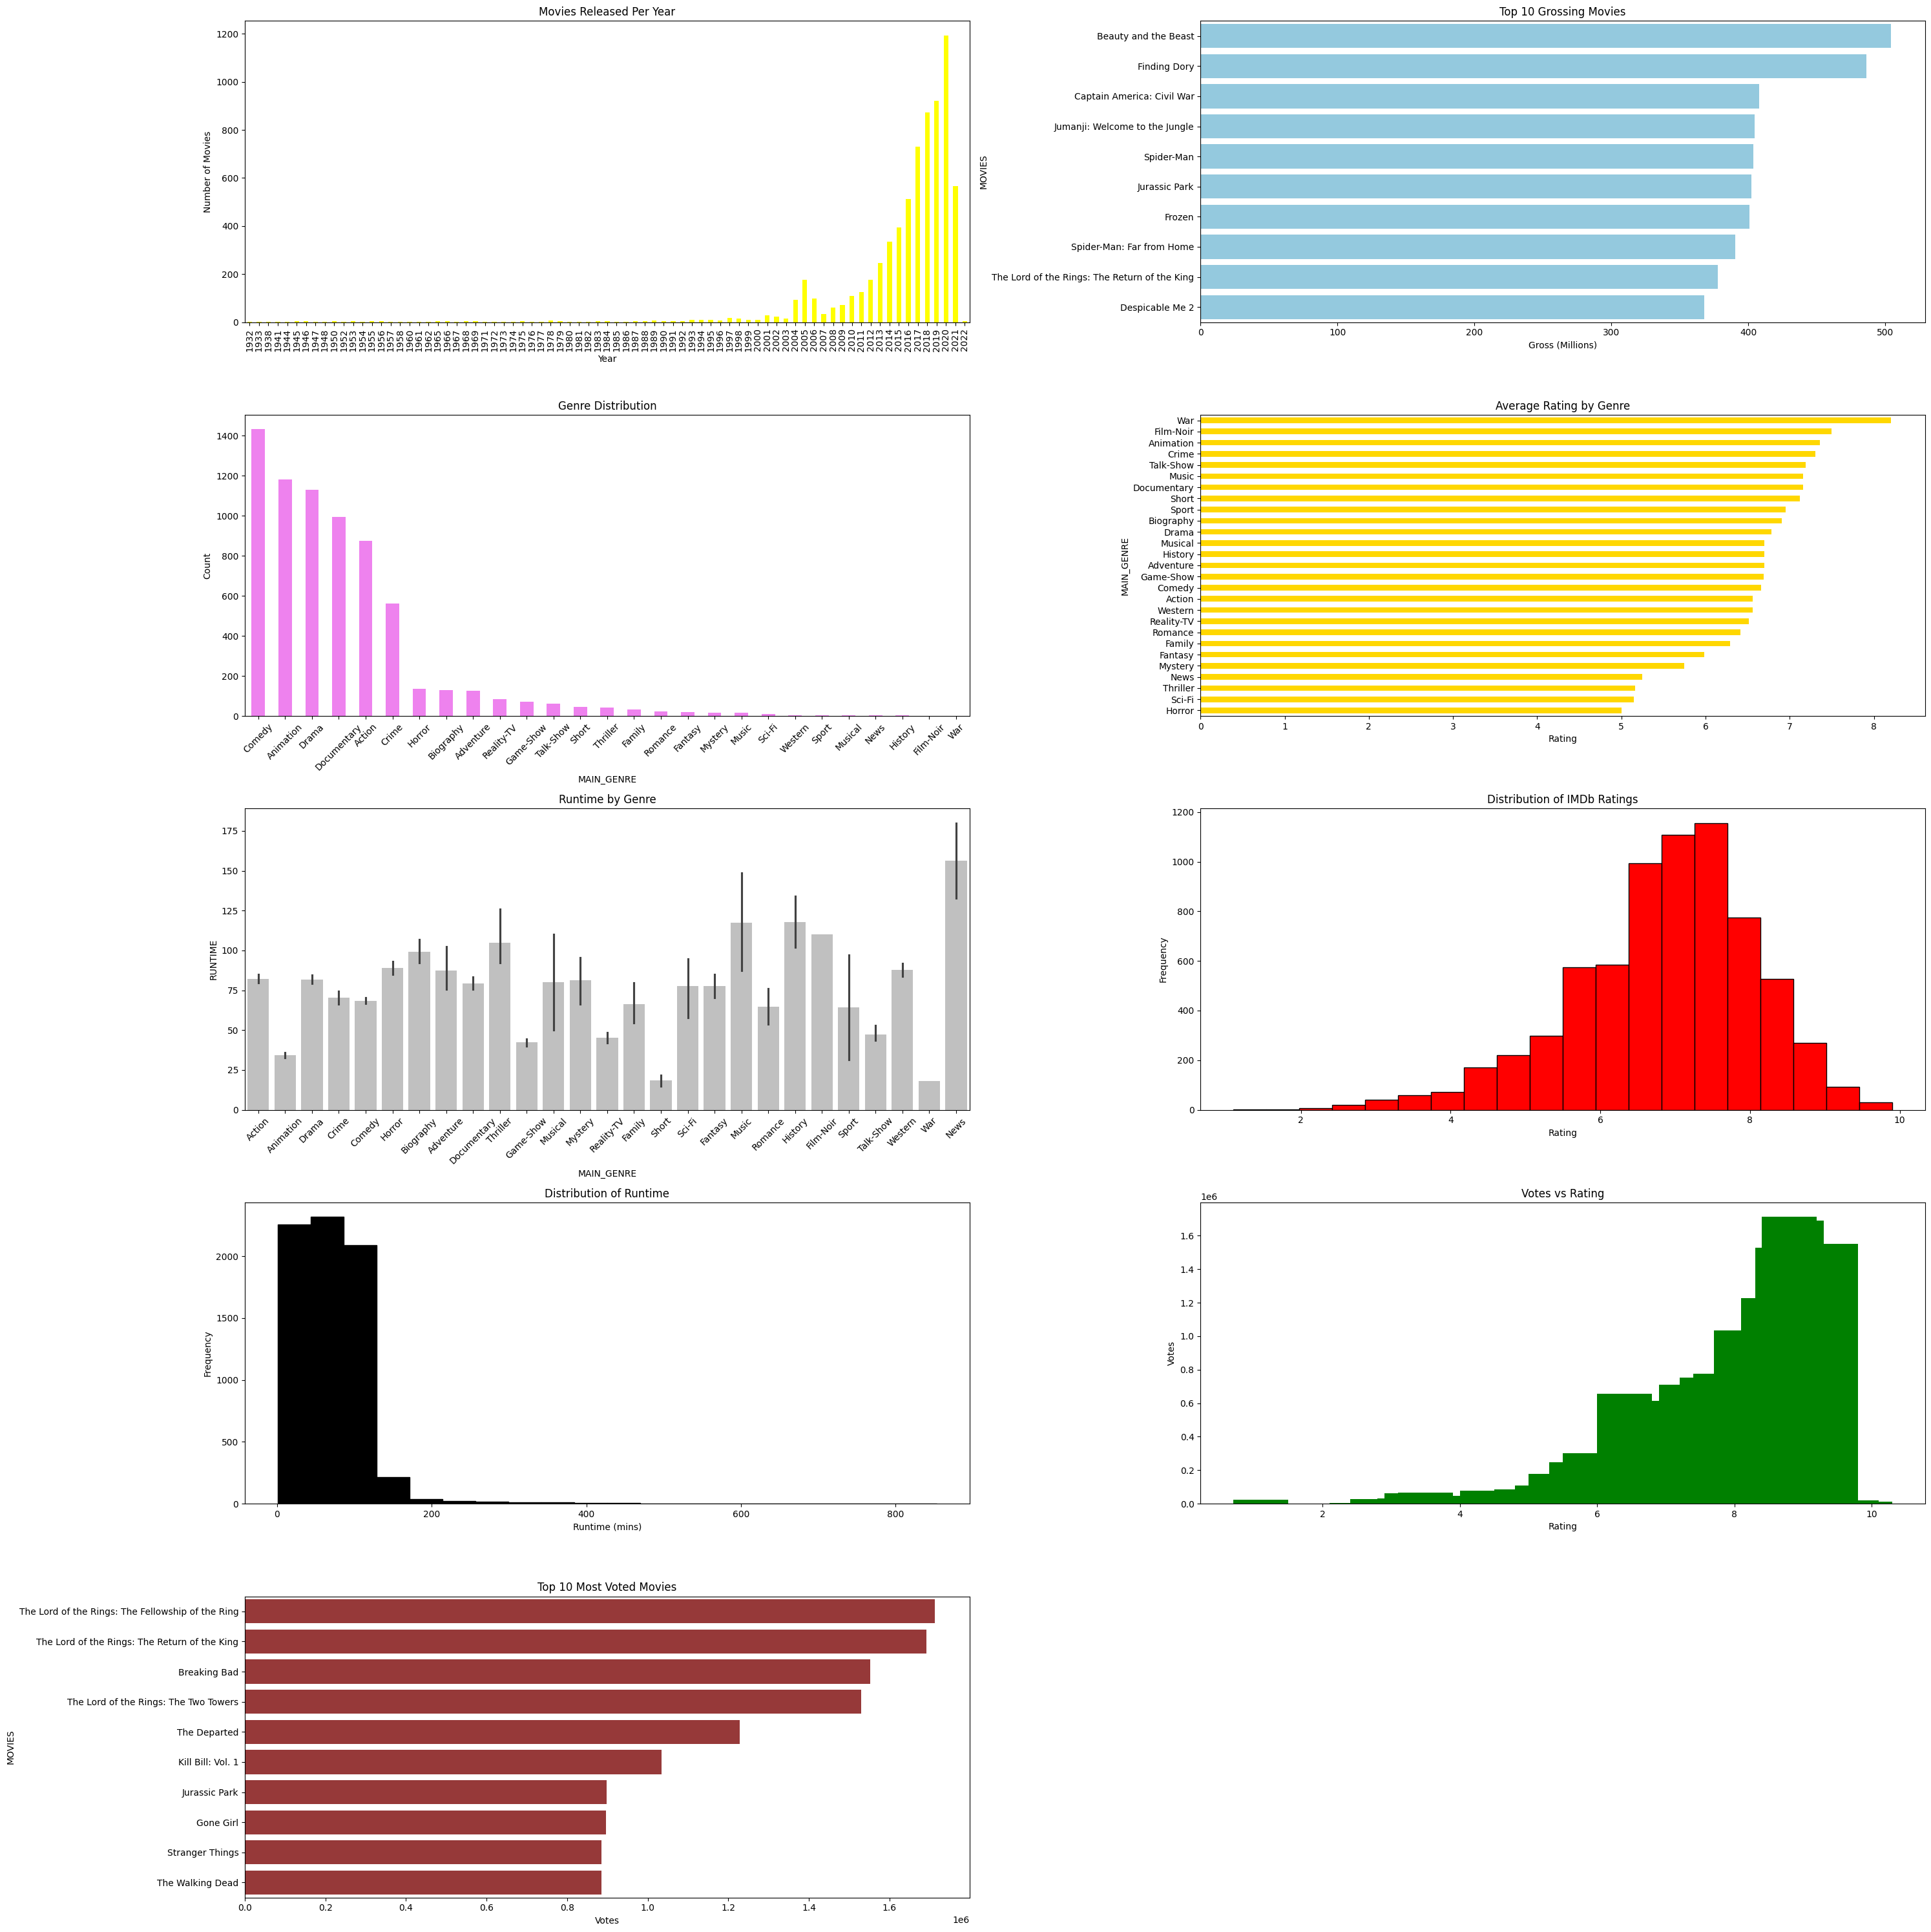

In [22]:
fig, axes = plt.subplots(5, 2, figsize=(30, 30))
axes = axes.flatten()
# 1. Movies per Year
df['YEAR'].value_counts().sort_index().plot(kind='bar', color='yellow', ax=axes[0])
axes[0].set_title('Movies Released Per Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Movies')
# 2. Top 10 Grossing
top_gross = df[['MOVIES', 'GROSS']].sort_values(by='GROSS', ascending=False).head(10)
sns.barplot(data=top_gross, y='MOVIES', x='GROSS', color='skyblue', ax=axes[1])
axes[1].set_title('Top 10 Grossing Movies')
axes[1].set_xlabel('Gross (Millions)')
# 3. Genre Distribution
df['MAIN_GENRE'].value_counts().plot(kind='bar', color='violet', ax=axes[2])
axes[2].set_title('Genre Distribution')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)
# 4. Avg Rating per Genre
genre_ratings = df.groupby('MAIN_GENRE')['RATING'].mean().sort_values()
genre_ratings.plot(kind='barh', color='gold', ax=axes[3])
axes[3].set_title('Average Rating by Genre')
axes[3].set_xlabel('Rating')
# 5. Runtime by Genre
sns.barplot(data=df, x='MAIN_GENRE', y='RUNTIME', color='silver', ax=axes[4])
axes[4].set_title('Runtime by Genre')
axes[4].tick_params(axis='x', rotation=45)
# 6. IMDb Ratings Histogram
df['RATING'].plot(kind='hist', bins=20, edgecolor='black', color='red', ax=axes[5])
axes[5].set_title('Distribution of IMDb Ratings')
axes[5].set_xlabel('Rating')
# 7. Runtime Histogram
df['RUNTIME'].plot(kind='hist', bins=20, edgecolor='black', color='black', ax=axes[6])
axes[6].set_title('Distribution of Runtime')
axes[6].set_xlabel('Runtime (mins)')
# 8. Votes vs Rating
axes[7].bar(df['RATING'], df['VOTES'], color='green')
axes[7].set_title('Votes vs Rating')
axes[7].set_xlabel('Rating')
axes[7].set_ylabel('Votes')
# 9. Top 10 Most Voted
top_votes = df[['MOVIES', 'VOTES']].sort_values(by='VOTES', ascending=False).head(10)
sns.barplot(data=top_votes, y='MOVIES', x='VOTES', color='brown', ax=axes[8])
axes[8].set_title('Top 10 Most Voted Movies')
axes[8].set_xlabel('Votes')
# Fill remaining unused subplots with empty text or hide them
for i in range(9, len(axes)):
    axes[i].axis('off')  # Hide unused plots
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [23]:
# 1. Highest rated movie
highest_rated = df.loc[df['RATING'].idxmax(), ['MOVIES', 'RATING']]
# 2. Most voted movie
most_voted = df.loc[df['VOTES'].idxmax(), ['MOVIES', 'VOTES']]
# 3. Most common genre
most_common_genre = df['GENRE'].value_counts().idxmax()
# 4. Year with most releases
most_releases_year = df['YEAR'].value_counts().idxmax()
# 5. Longest runtime
longest_runtime = df.loc[df['RUNTIME'].idxmax(), ['MOVIES', 'RUNTIME']]
# 6. Top grossing movie
top_grossing = df.loc[df['GROSS'].idxmax(), ['MOVIES', 'GROSS']]
# 7. Average rating
avg_rating = df['RATING'].mean()
# 8. Average runtime
avg_runtime = df['RUNTIME'].mean()
# 9. Total votes
total_votes = df['VOTES'].sum()
# 10. Total gross
total_gross = df['GROSS'].sum()

In [24]:
# Print results
print(f"1.Highest Rated Movie: {highest_rated['MOVIES']} – IMDb Rating: {highest_rated['RATING']}")
print(f"2.Most Voted Movie: {most_voted['MOVIES']} – Votes: {most_voted['VOTES']:,}")
print(f"3.Most Common Genre: {most_common_genre}")
print(f"4.Year with Most Releases: {most_releases_year}")
print(f"5.Longest Runtime: {longest_runtime['MOVIES']} – {longest_runtime['RUNTIME']} minutes")
print(f"6.Top Grossing Movie: {top_grossing['MOVIES']} – ${top_grossing['GROSS']:.2f}M")
print(f"7.Average Rating: {avg_rating:.2f}")
print(f"8.Average Runtime: {avg_runtime:.1f} minutes")
print(f"9.Total Votes: {total_votes:,}")
print(f"10.Total Gross Revenue: ${total_gross:,.2f}M")

1.Highest Rated Movie:  BoJack Horseman – IMDb Rating: 9.9
2.Most Voted Movie: The Lord of the Rings: The Fellowship of the Ring – Votes: 1,713,028.0
3.Most Common Genre: Comedy
4.Year with Most Releases: 2020
5.Longest Runtime: El tiempo entre costuras – 853 minutes
6.Top Grossing Movie: Beauty and the Beast – $504.01M
7.Average Rating: 6.87
8.Average Runtime: 68.9 minutes
9.Total Votes: 122,912,101.0
10.Total Gross Revenue: $20,168.30M
